In [1]:
#####produce txt containing file path#############
def filelist(wav_path,key_word):
    import os
    Filelist=[]
    #f=open(txt_path,"w")
    for root,dirs,files in os.walk(wav_path):
        for name in files:
            if name.find(key_word)!=-1:
                #print >> f, os.path.join(root, name)
                Filelist.append(os.path.join(root, name))
   # f.close()
    return Filelist

In [2]:
#####adjust wav frequency to 16kHZ#############
def transform(path):
    import subprocess
    F=filelist(path,'.wav')
    for x in F:
        x_out=x.replace('.wav','_2.wav')
        s=['sox',str(x),'-r 16000',str(x_out)]
        print s
        subprocess.call(s)

In [3]:
########edit file name######################
def remove(wav_path,key_word):
    import os
    Filelist=[]
    #f=open(txt_path,"w")
    for root,dirs,files in os.walk(wav_path):
        for name in files:
            if name.find(key_word)!=-1:
                #print >> f, os.path.join(root, name)
                os.remove(os.path.join(root, name))
   # f.close()
    #return Filelist

In [10]:
###frequency adjustment#####
transform(Swedish_path)
transform(English_path)
#transform(German_path)

KeyboardInterrupt: 

In [5]:
########produce label##########################
def production(path,keyword,label):
    import wave
    import contextlib
    F=filelist(path,keyword)
    for x in F:
        x_out=x.replace('.wav','.lab')
        m=open(x_out,'w')
        with contextlib.closing(wave.open(x,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames*1e7 / float(rate)
        print >> m, "0 %8.0f %s\n" % (duration,label) 
    m.close()

In [ ]:
production(English_path,'_2.wav','english')
production(Swedish_path,'_2.wav','swedish')
production(German_path,'.wav','german')

In [6]:
###########transform wav into mfc#######################################
def mfc(path,keyword):
    import subprocess
    F=filelist(path,keyword)
    for x in F:
        x_out=x.replace('.wav','.mfc')
        s=['HCopy','-C', '/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/config.txt',str(x),str(x_out)]
        print s
        subprocess.call(s)

In [ ]:
mfc(English_path,'_2.wav')
mfc(Swedish_path,'_2.wav')
mfc(German_path,'.wav')

In [7]:
##########produce txt containing filelist#################
def printfilelist(txt_path,filelist):
    f=open(txt_path,"w")
    for name in filelist:
            print >> f, name
    f.close()

In [ ]:
English=filelist(English_path,'.mfc')
Swedish=filelist(Swedish_path,'.mfc')
German=filelist(German_path,'.mfc')

In [ ]:
#######split data into training data and test data, making corresponding filelist txt################
English_train=English[:int(len(English)*0.9)]
English_test=English[int(len(English)*0.9):]
Swedish_train=Swedish[:int(len(Swedish)*0.9)]
Swedish_test=Swedish[int(len(Swedish)*0.9):]
German_train=German[:int(len(German)*0.9)]
German_test=German[int(len(German)*0.9):]
printfilelist('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/English_train.txt',English_train)
printfilelist('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/Swedish_train.txt',Swedish_train)
printfilelist('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/German_train.txt',German_train)

In [ ]:
######aggregate training and testing data#########################
train=English_train+Swedish_train+German_train
test=English_test+Swedish_test+German_test
printfilelist('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/training_data.txt',train)
printfilelist('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/testing_data.txt',test)

In [92]:
########extract feature vector from Hlist result##############
def feature_extraction(path,label):
    words=[]
    answer=[]
    with open(path, 'r') as f:
        data = f.readlines()
        for line in data:
            word = line.split()
            words.append(word)
    #print words
    i=0
    z=0
    data_list=[]
    data=[]
    while 1:
        if i==len(words):
            break
        #print i
        if len(words[i])!=0:
            if words[i][0].find(':')== -1:
                for x in range(len(words[i])):
                    data.append(float(words[i][x]))
                    #print data
                i=i+1
            else:
                z=z+1
                if i > 0:
                    data_list.append(data)
                    #print data
                    data=[]
                for y in range(1,len(words[i])):
                    data.append(float(words[i][y]))
                    #print words[i][y]
                i=i+1
        else:
            i=i+1
    answer=[label]*(z-1)
    return data_list,answer

In [53]:
########extract feature vector from Hlist result##############
def feature_extraction(path,label):
    words=[]
    answer=[]
    with open(path, 'r') as f:
        data = f.readlines()
        for line in data:
            word = line.split()
            words.append(word)
    #print words
    i=0
    z=0
    data_list=[]
    data=[]
    while 1:
        if i==len(words):
            break
        #print i
        if len(words[i])!=0:
            if words[i][0].find(':')== -1:
#                 for x in range(len(words[i])):
#                     data.append(float(words[i][x]))
#                     #print data
                i=i+1
            else:
                z=z+1
                if i > 0:
                    data_list.append(data)
                    #print data
                    data=[]
                for y in range(1,len(words[i])):
                    data.append(float(words[i][y]))
                    #print words[i][y]
                i=i+1
        else:
            i=i+1
    answer=[label]*(z-1)
    return data_list,answer

In [93]:
######extract feature vector from Hlist result#####################
def batch_production(path,label):
    feature_all=[]
    trans_all=[]
    m=open(path,'r')
    while 1:
        name=m.readline()
        print name
        if len(name)==0:
            break
        import os
        command='HList -h -s 0 '+name
        print command
        r=os.popen(command)
        #time.sleep(1)
        info=r.readlines()
        #print info[4]
        text=open('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/hlist.txt','w')
        for i in range (5,len(info)-1):
            print >> text, info[i]
        text.close()
        feature,trans=feature_extraction('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/hlist.txt',label)
        feature_all.extend(feature)
        trans_all.extend(trans)
    m.close()
    return feature_all,trans_all

In [96]:
F_g,R_g=batch_production('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/German_train2.txt',0)
#F_e,R_e=batch_production('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/English_train2.txt',1)
#F_s,R_s=batch_production('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/Swedish_train2.txt',2)
# print F_g,R_g
# print F_e,R_e
# print F_s,R_s

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.1.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.1.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.2.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.2.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.3.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.3.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.4.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T005.4.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-G

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T011.9.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T011.9.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T013.1.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T013.1.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T013.2.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T013.2.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T013.3.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m002T013.3.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-G

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.1.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.1.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.2.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.2.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.3.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.3.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.4.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T055.4.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-G

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.3.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.3.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.4.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.4.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.5.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.5.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.6.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m007T062.6.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-G

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.5.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.5.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.6.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.6.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.7.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.7.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.8.mfc

HList -h -s 0 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-Ge/READ_SPEECH_GERMAN/wav16kHz/m008T046.8.mfc

/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/PF-STAR/PF-STAR-G

In [97]:
print len(F_g),len(R_g)
print len(F_e),len(R_e)
print len(F_s),len(R_s)

138576 138576
157269 157269
125901 125901


In [98]:
F=[]
F.extend(F_g)
F.extend(F_e)
F.extend(F_s)
R=[]
R.extend(R_g)
R.extend(R_e)
R.extend(R_s)
print len(F),len(R)

421746 421746


In [99]:
#########random split training data&testing data###############
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
features_train,features_test,label_train,label_test=train_test_split(F,R,test_size=0.33,random_state=42)

In [100]:
#####Naive Bayes#####################
clf=GaussianNB()
clf.fit(features_train,label_train)
target_pred=clf.predict(features_test)
accuracy_score(label_test,target_pred,normalize=True)

0.43135000754434999

In [101]:
######Decision Tree#####################
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
acc_list=[]
for i in range(5,35,5):
    print i
    clf = DecisionTreeClassifier(max_depth=i,random_state=0)
    clf.fit(features_train,label_train)
    x=clf.score(features_test,label_test,sample_weight=None)
    print x
    acc_list.append(x)

5
0.472542158546
10
0.584083577028
15
0.632834448221
20
0.627862362316
25
0.618155298648
30
0.61534592641


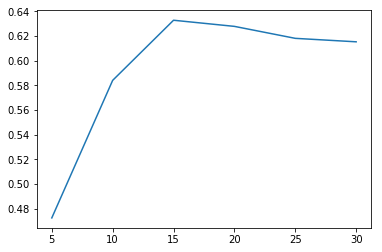

In [103]:
#####plot result##########
import matplotlib.pyplot as plt
x=[5,10,15,20,25,30]
plt.figure()
plt.plot(x, acc_list)
plt.show()

In [45]:
##########train UBM with 1 component############
import subprocess
s=['HInit','-T', '1','-M',
   '/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm0',
   '-S','/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/training_data2.txt',
   '/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/init.txt']
print s
subprocess.call(s)

['HInit', '-T', '1', '-M', '/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm0', '-S', '/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/training_data2.txt', '/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/init.txt']


KeyboardInterrupt: 

In [74]:
#########produce UBM prototype with multiple components##############
cmds=['MU 2 {*.state[2].mix}','MU 4 {*.state[2].mix}','MU 8 {*.state[2].mix}','MU 16 {*.state[2].mix}','MU 32 {*.state[2].mix}','MU 64 {*.state[2].mix}','MU 128 {*.state[2].mix}']
command='HHEd -H /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm1/init -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm2  -T 1 /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/cmds.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/hmmlist.txt'
import os
hmm='hmm'
for i in range (4,5):
    print i
    newhmm=hmm+str(2**(i+1))
    #print newhmm
    command_new=command.replace('hmm2',newhmm)
    #print command_new
    text=open('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/cmds.txt','w')
    print >> text, cmds[i]
    text.close()
    r=os.popen(command_new)
   

4


In [75]:
############train UBM with multiple components#################
def train(language):
    hmm='hmm'
    command_new=""
    command_final=""
    command='HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm1 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/Swedish_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm1/init'
    import os
    if language=="english":
        command_new=command.replace('hmm_S','hmm_E')
        command_new=command_new.replace('Swedish_train.txt',
                                        'English_train.txt')
    if language=='german':
        command_new=command.replace('hmm_S','hmm_G')
        command_new=command_new.replace('Swedish_train.txt',
                                        'German_train.txt')
    if language=="swedish":
        command_new=command
    #print command_new
    for i in range(7):
        inputhmm=hmm+str(2**(i))
        print i
        #print inputhmm
        command_final=command_new.replace('hmm1',inputhmm)
        print command_final
        r=os.popen(command_final)

In [76]:
train('english')
train('german')
train('swedish')

0
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm1 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/English_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm1/init
1
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm2 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/English_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm2/init
2
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm4 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/English_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm4/init
3
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm8 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/English_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm8/init
4
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA

KeyboardInterrupt: 

In [77]:
train('german')

0
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm1 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/German_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm1/init
1
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm2 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/German_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm2/init
2
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm4 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/German_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm4/init
3
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm8 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/German_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm8/init
4
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big

In [78]:
train('swedish')

0
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm1 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/Swedish_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm1/init
1
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm2 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/Swedish_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm2/init
2
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm4 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/Swedish_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm4/init
3
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm8 -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/Swedish_train.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm8/init
4
HRest -T 1 -w 10 -M /Users/chujunchen/Desktop/COLUMBIA

KeyboardInterrupt: 

In [2]:
#######calcualte probablity that data fits in the model################
def test(language,i):
    import time
    import os
    hmm='hmm'
    inputhmm=''
    command='HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm1/init'
    if language=='swedish':
        command=command.replace('hmm_E','hmm_S')
    if language=='german':
        command=command.replace('hmm_E','hmm_G')
    inputhmm=hmm+str(2**int(i))
    command=command.replace('hmm1',inputhmm)
    print command
    r=os.popen(command)
    #time.sleep(1)
    info=r.readlines()
    #print info
    info2=info[-2].split('iter 1 =')[1]
    info3=info2.split(' using')[0]
    #print info3
    return float(info3)

In [16]:
##########test accuracy of the model#######################
import time
import os
count=0
correct=0
max_prob=-1e20
result='none'
acc_list=[]
label=['english','swedish','german']
for num in range(7):
    testlist=open('/Users/chujunchen/Desktop/trail.txt')
    print num
    #index=num
    while 1:
        mfc=testlist.readline()
        if not mfc:
            testlist.close()
            break
        count=count+1
        single=open('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt','w')
        print >> single, mfc
        #print mfc
        single.close()
        for x in label:
            prob=test(x,num)
            if prob > max_prob:
                max_prob=prob
                result=x
                print "result is", result
        tag=mfc.replace('.mfc','.lab').replace('\n','')
        #print tag
        x=open(tag)
        y=x.readline()
        z=y.split(' ')[1]
        answer=y.split(z+' ')[1]
        print "answer is", answer
        if cmp(answer,result)==1:
            correct=correct+1
            print "correct"
        else:
            print "wrong"  
    accuracy=float(correct)/float(count)
    print accuracy
    acc_list.append(accuracy)

0
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm1/init
result is english
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm1/init
result is swedish
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm1/init
result is german
answer is german

correct
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm1/init
res

answer is english

correct
1.0
4
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm16/init
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm16/init
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm16/init
answer is german

correct
HRest -T 1 -i 1 -m 1 -M /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/test -S /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Filelist/test.txt /Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm16/init
result is english
HRe

In [1]:
#####plot result##########
import matplotlib.pyplot as plt
x=[1,2,4,8,16,32,64]
plt.figure()
plt.plot(x, acc_list)
plt.show()

NameError: name 'acc_list' is not defined

In [16]:
######extract parameter of trained GMM######
def parameter_produce(path): 
    proto=open(path)
    data=proto.readlines()
    x=data[8].split(' ')[13]
    mean=float(x)
    h=data[10].split(' ')[13]
    variance=float(h)**(0.5)
    return (mean,variance)

In [17]:
mean_old,variance_old=parameter_produce('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm1/init')
mean_E,variance_E=parameter_produce('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm1/init')
mean_S,variance_S=parameter_produce('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm1/init')
mean_G,variance_G=parameter_produce('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm1/init')
print mean_old,variance_old
print mean_E,variance_E
print mean_S,variance_S
print mean_G,variance_G

-1.218818e-07 7.76013852969
5.327432e-08 6.59605563955
-9.862052e-08 8.26018280669
1.614171e-07 7.6331350047


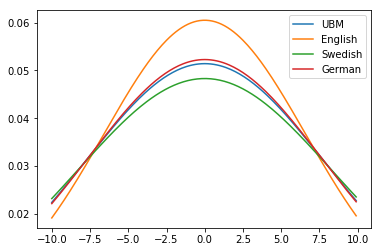

In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
x=np.arange(-10,10,1e-1)
gaussian_old=stats.norm.pdf(x,mean_old,variance_old)
gaussian_E=stats.norm.pdf(x,mean_E,variance_E)
gaussian_S=stats.norm.pdf(x,mean_S,variance_S)
gaussian_G=stats.norm.pdf(x,mean_G,variance_G)
line_UBM, = plt.plot(x,gaussian_old,label='UBM')
line_E, = plt.plot(x,gaussian_E,label='English')
line_S, = plt.plot(x,gaussian_S,label='Swedish')
line_G, = plt.plot(x,gaussian_G,label='German')
plt.legend(handles=[line_UBM,line_E,line_S,line_G])
#plt.plot(x,gaussian_old,'y',x,gaussian_E,'b',x,gaussian_S,'g',x,gaussian_G,'r')
plt.show()

In [2]:
def parameter_produce2(path):
    proto=open(path)
    data=proto.readlines()
    weight1=data[8].split(' ')[2]
    mean1=data[10].split(' ')[13]
    var1=data[12].split(' ')[13]
    weight2=data[14].split(' ')[2]
    mean2=data[16].split(' ')[13]
    var2=data[18].split(' ')[13]
    return float(mean1),float(mean2),float(var1)**(0.5),float(var2)**(0.5),float(weight1),float(weight2)

In [3]:
mean1_old,mean2_old,variance1_old,variance2_old,weight1_old,weight2_old=parameter_produce2('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm2/init')
mean1_E,mean2_E,variance1_E,variance2_E,weight1_E,weight2_E=parameter_produce2('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_E/hmm2/init')
mean1_S,mean2_S,variance1_S,variance2_S,weight1_S,weight2_S=parameter_produce2('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_S/hmm2/init')
mean1_G,mean2_G,variance1_G,variance2_G,weight1_G,weight2_G=parameter_produce2('/Users/chujunchen/Desktop/COLUMBIA/Big_Data/pj/Prototypes/hmm_G/hmm2/init')
print mean1_old,mean2_old,variance1_old,variance2_old,weight1_old,weight2_old
print mean1_E,mean2_E,variance1_E,variance2_E,weight1_E,weight2_E
print mean1_S,mean2_S,variance1_S,variance2_S,weight1_S,weight2_S
print mean1_G,mean2_G,variance1_G,variance2_G,weight1_G,weight2_G

1.552028 -1.552028 7.76013852969 7.76013852969 0.5 0.5
-3.717838 3.099985 4.99746435705 6.15457878331 0.454701 0.545299
-4.882578 3.621886 6.47313988726 7.55660174946 0.4259014 0.5740985
-2.063837 1.375892 8.36910150494 6.75932762928 0.4000508 0.5999493


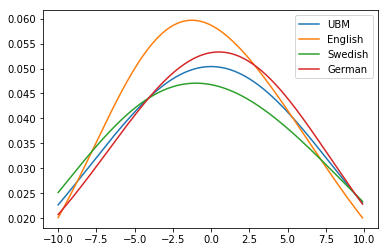

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
x=np.arange(-10,10,1e-1)
gaussian_old=stats.norm.pdf(x,mean1_old,variance1_old)*weight1_old+stats.norm.pdf(x,mean2_old,variance2_old)*weight2_old
gaussian_E=stats.norm.pdf(x,mean1_E,variance1_E)*weight1_E+stats.norm.pdf(x,mean2_E,variance2_E)*weight2_E
gaussian_S=stats.norm.pdf(x,mean1_S,variance1_S)*weight1_S+stats.norm.pdf(x,mean2_S,variance2_S)*weight2_S
gaussian_G=stats.norm.pdf(x,mean1_G,variance1_G)*weight1_G+stats.norm.pdf(x,mean2_G,variance2_G)*weight2_G
line_UBM, = plt.plot(x,gaussian_old,label='UBM')
line_E, = plt.plot(x,gaussian_E,label='English')
line_S, = plt.plot(x,gaussian_S,label='Swedish')
line_G, = plt.plot(x,gaussian_G,label='German')
plt.legend(handles=[line_UBM,line_E,line_S,line_G])
plt.show()

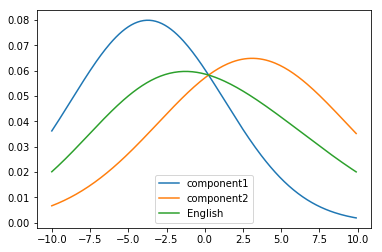

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
x=np.arange(-10,10,1e-1)
gaussian_1=stats.norm.pdf(x,mean1_E,variance1_E)
gaussian_2=stats.norm.pdf(x,mean2_E,variance2_E)
gaussian_all=stats.norm.pdf(x,mean1_E,variance1_E)*weight1_E+stats.norm.pdf(x,mean2_E,variance2_E)*weight2_E
line_UBM, = plt.plot(x,gaussian_1,label='component1')
line_E, = plt.plot(x,gaussian_2,label='component2')
line_S, = plt.plot(x,gaussian_all,label='English')
plt.legend(handles=[line_UBM,line_E,line_S])
plt.show()

In [67]:
print 2**7

128
